### Visualizations of Global temperature yearly and overall average data

In [201]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# netCDF4 needs to be installed in your environment for this to work
import xarray as xr
import rioxarray as rxr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import seaborn as sns
import geopandas as gpd
import earthpy as et

# Plotting options
sns.set(font_scale=1.3)
sns.set_style("white")

In [202]:
yearly_mean_path = "D:\yearlymean.nc"
mean_temp_yearly = xr.open_dataset(yearly_mean_path)

In [203]:
mty = mean_temp_yearly['skt']

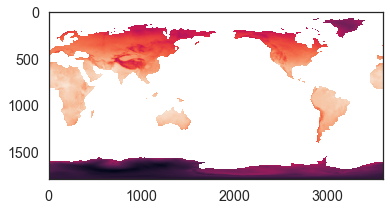

In [204]:
plt.imshow(mty[1])
plt.show()

In [205]:
#mty[1].shape
#mty[1].values.shape
print("Should be", mty[1].values.shape[0]*mty[1].values.shape[1], "is", mty[1].values.flatten().shape)

Should be 6483600 is (6483600,)


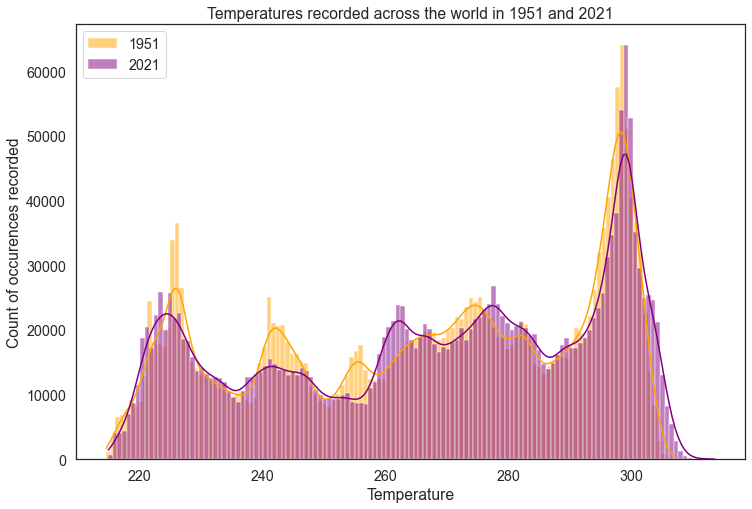

In [219]:
plt.figure(figsize = (12,8))
sns.histplot(x=mty[0].values.flatten(), kde=True, color="orange", label = "1951")
sns.histplot(x=mty[-2].values.flatten(), kde=True, color="purple", label = "2021")

plt.xlabel('Temperature')
plt.ylabel('Count of occurences recorded')
plt.title('Temperatures recorded across the world in 1951 and 2021')
plt.legend(loc="upper left")

plt.show()

In [220]:
mty_diff = mty[-2].values.flatten() - mty[0].values.flatten() 
mty_diff = mty_diff[~np.isnan(mty_diff)]
df = pd.DataFrame(mty_diff, columns = ['differences'])

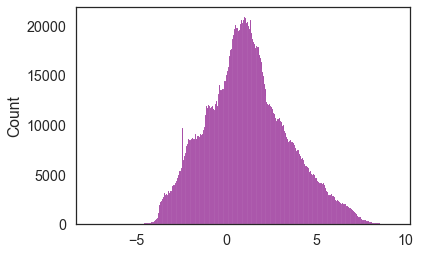

In [239]:
#plt.figure(figsize = (12,8))
sns.histplot(mty_diff, color="purple")
plt.show()

In [228]:
df.mean()

differences    1.193003
dtype: float32

### Let's look into a long term data differences to understand better the trends and make sense of it

In [223]:
mean_1950_1960 = mty[0:11]
mean_2012_2022 = mty[-11:]

In [224]:
mean_1950_1960 = mean_1950_1960.mean(dim = ["year"])
mean_2012_2022 = mean_2012_2022.mean(dim = ["year"])

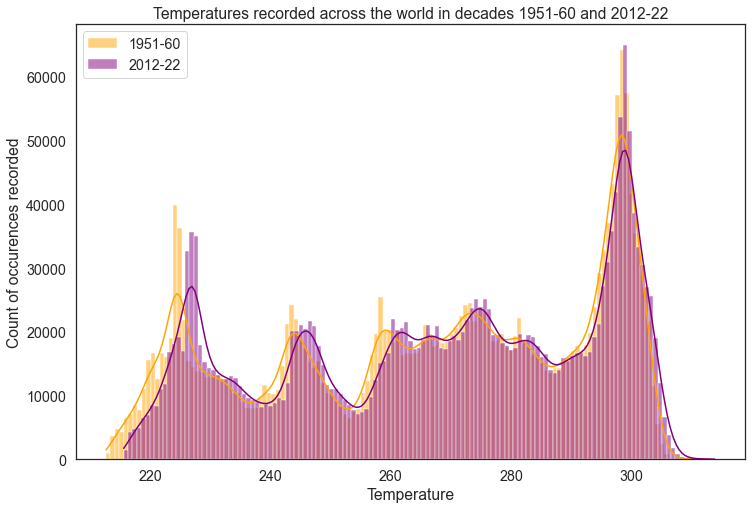

In [225]:
plt.figure(figsize = (12,8))
sns.histplot(x=mean_1950_1960.values.flatten(), kde=True, color="orange", label = "1951-60")
sns.histplot(x=mean_2012_2022.values.flatten(), kde=True, color="purple", label = "2012-22")

plt.xlabel('Temperature')
plt.ylabel('Count of occurences recorded')
plt.title('Temperatures recorded across the world in decades 1951-60 and 2012-22')
plt.legend(loc="upper left")

plt.show()

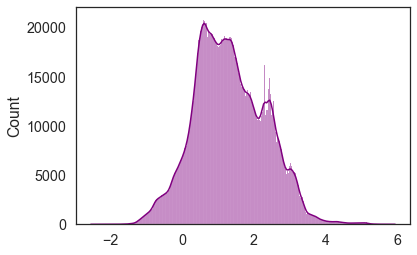

In [238]:
mtd_diff = mean_2012_2022.values.flatten() - mean_1950_1960.values.flatten()
mtd_diff = mtd_diff[~np.isnan(mtd_diff)]

sns.histplot(mtd_diff, color="purple", kde = True)
plt.show()

In [227]:
mtd_diff.mean()

1.3316382

Temperature difference between 2 decades is 1.331. Global temperature is on average 1.33° C hotter than it was in 1951. 